In [1]:
from keras.datasets import reuters 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

2023-07-03 00:48:04.207880: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 00:48:04.209095: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 00:48:04.234655: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 00:48:04.235101: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 00:48:04.739633: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
     results = np.zeros((len(sequences), dimension))
     for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
     return results 

##### 将训练数据向量化
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data) 

##### one-hot编码
from keras.utils.np_utils import to_categorical 
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

##### 将训练数据分为输入数据和验证数据
x_val = x_train[:1000]
partial_x_train = x_train[1000:] 
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Epoch 1/30
16/16 [==============================] - 0s 14ms/step - loss: 3.1451 - accuracy: 0.3971 - val_loss: 2.5581 - val_accuracy: 0.5800
Epoch 2/30
16/16 [==============================] - 0s 6ms/step - loss: 2.2028 - accuracy: 0.6505 - val_loss: 1.9419 - val_accuracy: 0.6630
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 1.7011 - accuracy: 0.6954 - val_loss: 1.5973 - val_accuracy: 0.6860
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 1.4006 - accuracy: 0.7207 - val_loss: 1.3914 - val_accuracy: 0.7010
Epoch 5/30
16/16 [==============================] - 0s 8ms/step - loss: 1.2012 - accuracy: 0.7486 - val_loss: 1.2549 - val_accuracy: 0.7310
Epoch 6/30
16/16 [==============================] - 0s 6ms/step - loss: 1.0568 - accuracy: 0.7715 - val_loss: 1.1638 - val_accuracy: 0.7450
Epoch 7/30
16/16 [==============================] - 0s 7ms/step - loss: 0.9439 - accuracy: 0.7959 - val_loss: 1.0955 - val_accuracy: 0.7620
Epoch 8/30
16/16 [=

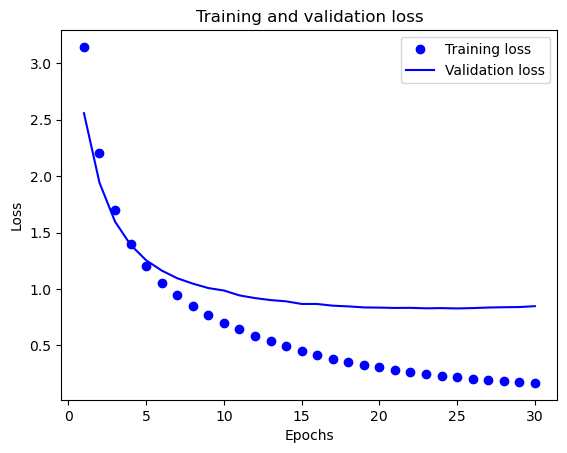

In [3]:
from keras import models
from keras import layers 
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(partial_x_train,
 partial_y_train,
 epochs=30,
 batch_size=512,
 validation_data=(x_val, y_val))

import matplotlib.pyplot as plt 
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(loss) + 1) 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.show()

In [4]:
predictions = model.predict(x_test)
predictions[0].shape
predictions[0]

71/71 [==============================] - 0s 977us/step


array([1.44405203e-04, 5.13549858e-05, 1.66756479e-06, 8.85129631e-01,
       1.11780256e-01, 8.87460985e-08, 3.49610928e-05, 1.35419396e-05,
       2.61020585e-04, 6.65301968e-07, 2.70691567e-06, 7.27383245e-04,
       3.93240116e-05, 6.85162968e-06, 1.42534554e-06, 7.78192259e-07,
       1.75847468e-04, 1.71413467e-06, 1.83818192e-05, 1.80917850e-04,
       3.91809561e-04, 1.14867413e-04, 6.81632798e-07, 1.68612205e-05,
       1.51090688e-07, 1.25298611e-05, 1.78644757e-06, 7.18573392e-06,
       1.13787257e-06, 3.59642945e-05, 5.54285689e-05, 6.93497304e-06,
       1.30278943e-06, 7.64122706e-06, 1.70310559e-05, 2.57329953e-06,
       7.03543192e-04, 8.40627945e-06, 1.38544522e-06, 1.85733988e-05,
       9.28660995e-07, 1.73636363e-05, 1.14314560e-06, 1.63438813e-06,
       4.17821155e-08, 2.26552828e-07], dtype=float32)